# Testing script for CNN model #

In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import os
import tensorflow as tf
import keras.backend as K

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.9
K.tensorflow_backend.set_session(tf.Session(config=config))

curr_dir = os.chdir("C:/Users/PC/Desktop/Fruit Classification/Data/Training")
curr_dir = os.getcwd()

classes = [name for name in os.listdir(".") if os.path.isdir(name)]
classifier = load_model(
    "C:/Users/PC/Desktop/Fruit Classification/weights/weights-improvement-50-0.9861.hdf5")
datagen_test = ImageDataGenerator(rescale=1./255)
test_dir = "C:/Users/PC/Desktop/Fruit Classification/Data/Test/"
generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  batch_size=12,
                                                  target_size=(
                                                      100, 100),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  )
y_test = generator_test.classes
y_pred = []
result = classifier.predict_generator(generator_test)
res_dic_list = []

for _ in range(len(classes)):
    res_dic_list.append(dict())
for i, img in enumerate(result):
    name = classes[np.argmax(img)]
    y_pred.append(np.argmax(img))
    true_class_index = y_test[i]
    true_name = classes[true_class_index]

    if name in res_dic_list[true_class_index]:
        res_dic_list[true_class_index][name] = res_dic_list[true_class_index][name] + 1
    else:
        res_dic_list[true_class_index][name] = 1

Using TensorFlow backend.


Found 12132 images belonging to 72 classes.


# Test Result for each class folder #

In [2]:
for i in range(len(classes)):
    print(classes[i])
    print(res_dic_list[i])
    print('\n')

Apple Braeburn
{'Apple Red 2': 14, 'Apple Braeburn': 71, 'Apple Red 1': 10, 'Apple Red Yellow': 15, 'Passion Fruit': 12, 'Limes': 6, 'Apple Golden 3': 18, 'Maracuja': 2, 'Apple Granny Smith': 16}


Apple Golden 1
{'Apple Golden 2': 23, 'Cantaloupe 2': 46, 'Cantaloupe 1': 26, 'Apple Golden 3': 17, 'Apple Granny Smith': 26, 'Kumquats': 26}


Apple Golden 2
{'Apple Golden 2': 94, 'Apple Golden 3': 2, 'Cantaloupe 2': 31, 'Cantaloupe 1': 1, 'Lemon': 14, 'Grapefruit White': 22}


Apple Golden 3
{'Apple Golden 3': 102, 'Apple Granny Smith': 29, 'Apple Golden 1': 20, 'Apple Red 2': 10}


Apple Granny Smith
{'Apple Golden 3': 45, 'Apple Granny Smith': 44, 'Melon Piel de Sapo': 14, 'Apple Red 2': 40, 'Apple Golden 1': 21}


Apple Red 1
{'Apple Red Yellow': 19, 'Apple Red 1': 12, 'Limes': 7, 'Apple Granny Smith': 7, 'Mango': 6, 'Kiwi': 13, 'Cherry 2': 43, 'Mandarine': 1, 'Grape White': 2, 'Grapefruit White': 8, 'Apple Red 2': 14, 'Guava': 2, 'Lemon': 26, 'Apple Red 3': 4}


Apple Red 2
{'Apple Re

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = classes

cm = confusion_matrix(y_test, y_pred)

In [16]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(40,40))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 71   0   0 ...,   0   0   0]
 [  0   0  23 ...,   0   0   0]
 [  0   0  94 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,  21   0   0]
 [  0   0   0 ...,   2 152   0]
 [  0   0   0 ...,   0   0   6]]


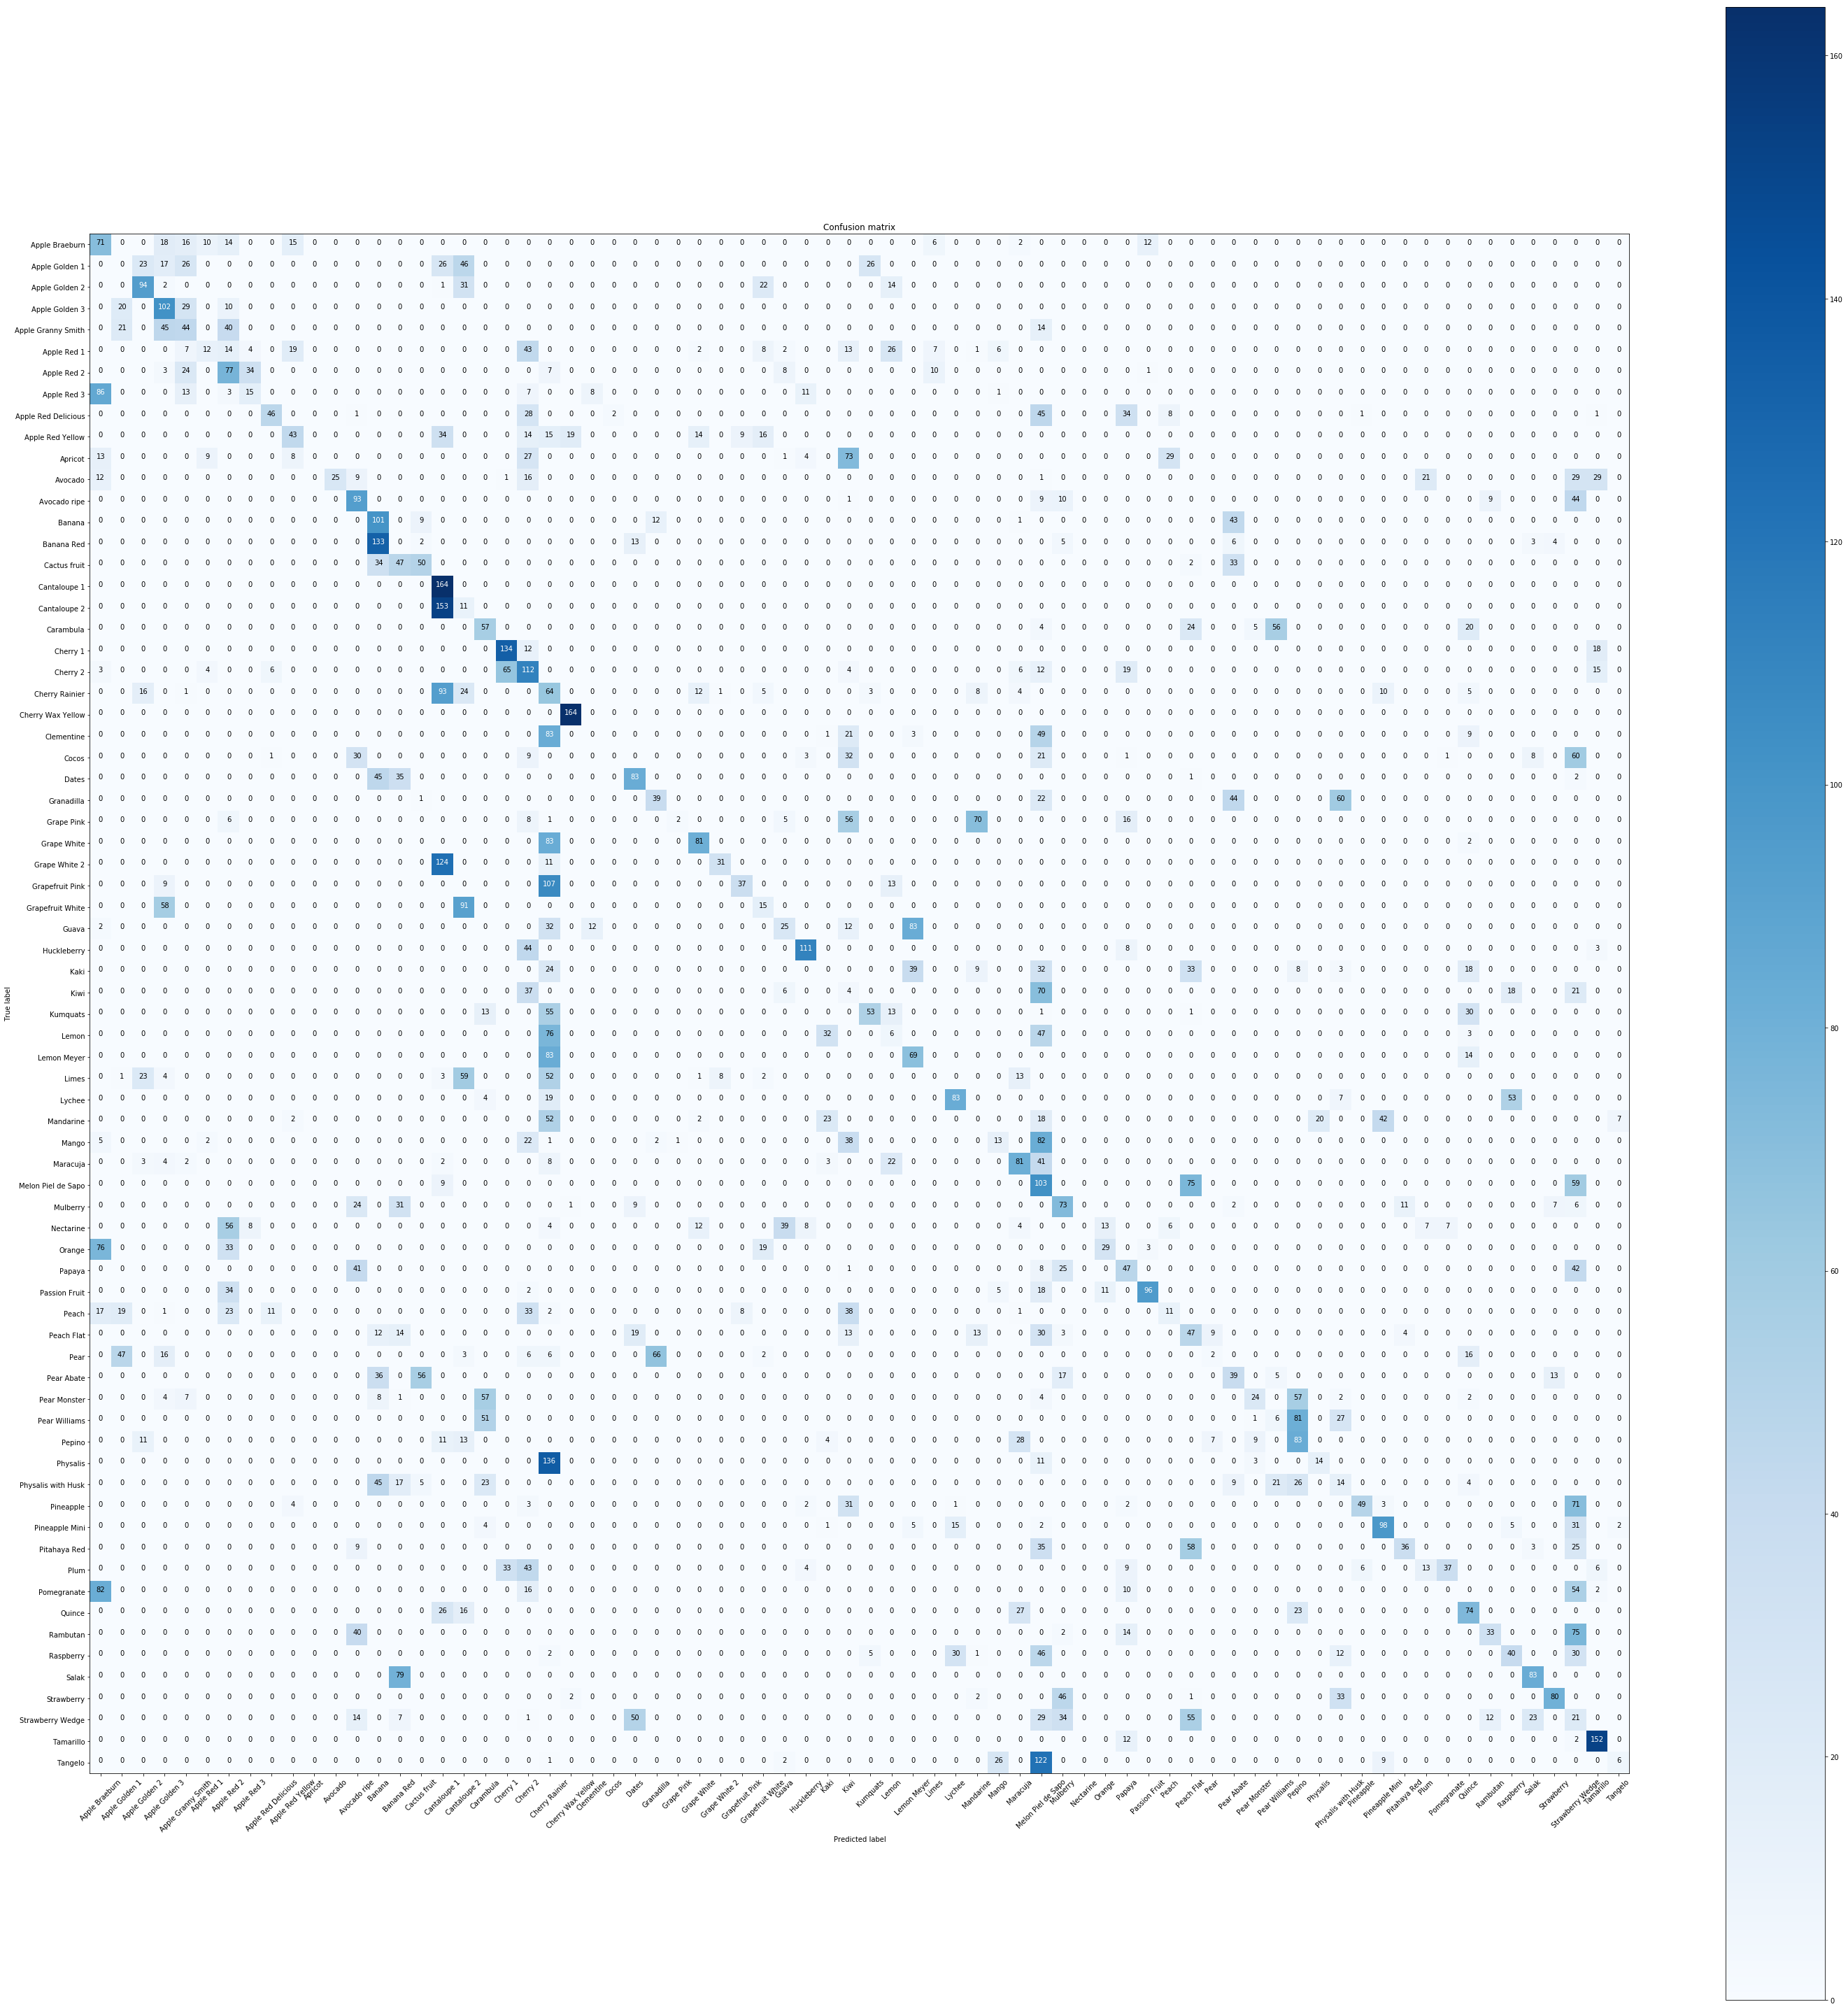

In [17]:
plot_confusion_matrix(cm, classes)

In [5]:
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

     Apple Braeburn       0.19      0.43      0.27       164
     Apple Golden 1       0.00      0.00      0.00       164
     Apple Golden 2       0.55      0.57      0.56       164
     Apple Golden 3       0.36      0.63      0.46       161
 Apple Granny Smith       0.26      0.27      0.26       164
        Apple Red 1       0.32      0.07      0.12       164
        Apple Red 2       0.25      0.47      0.32       164
        Apple Red 3       0.25      0.10      0.15       144
Apple Red Delicious       0.72      0.28      0.40       166
   Apple Red Yellow       0.47      0.26      0.34       164
            Apricot       0.00      0.00      0.00       164
            Avocado       1.00      0.17      0.30       143
       Avocado ripe       0.36      0.56      0.44       166
             Banana       0.24      0.61      0.35       166
         Banana Red       0.00      0.00      0.00       166
       Cactus fruit    

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
